<a href="https://colab.research.google.com/github/kirath2205/Information-Retrieval/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
bmw = pd.read_csv('BMW_Labelled.csv')
bmw.drop("Unnamed: 0",axis=1, inplace=True)
bmw = bmw[(bmw['Sentiment']==1) | (bmw['Sentiment']==0) | (bmw['Sentiment']==-1)]
bmw.reset_index(inplace=True, drop=True)
bmw.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,23ABCNews,1.650000e+12,29/3/2022 23:45,-1.0,UPDATE: CHP said a man was killed Monday night...,en,[],[],https://twitter.com/23ABCNews/status/150883271...,['https://www.turnto23.com/news/local-news/one...,[],0,NaN,0,0,0
1,1.510000e+18,CloseHouseGolf,1.650000e+12,29/3/2022 23:30,1.0,Another incredible Close House VIP car deliver...,en,"['bmw', 'vip', 'dreamcar']",[],https://twitter.com/CloseHouseGolf/status/1508...,[],['https://pbs.twimg.com/media/FPBv1x2WQA49E4s....,1,https://pbs.twimg.com/media/FPBv1x2WQA49E4s.jpg,7,0,0
2,1.510000e+18,GadgetFlow,1.650000e+12,29/3/2022 23:30,1.0,The @BMW Motorrad Definition CE 04 sit-on #eSc...,en,"['escooter', 'transportation']",[],https://twitter.com/GadgetFlow/status/15088288...,['https://thegadgetflow.com/portfolio/bmw-moto...,['https://pbs.twimg.com/media/FPBv1chX0AcuHfs....,1,https://pbs.twimg.com/media/FPBv1chX0AcuHfs.jpg,0,0,0
3,1.510000e+18,TheBoltonNews,1.650000e+12,29/3/2022 23:02,-1.0,'A tragedy for all concerned': Speeding driver...,en,[],[],https://twitter.com/TheBoltonNews/status/15088...,['https://www.theboltonnews.co.uk/news/2002930...,[],0,NaN,1,0,1
4,1.510000e+18,BMW_UK,1.650000e+12,29/3/2022 22:33,-1.0,"@lynpaul6 Hi Lyn, we're sorry to hear your BMW...",en,[],[],https://twitter.com/BMW_UK/status/150881450842...,[],[],0,NaN,0,2,0


In [ ]:
bmw.shape

(438, 17)

In [ ]:
print("Positive: "+str(len(bmw[bmw['Sentiment']==1])))
print("Neutral: "+str(len(bmw[bmw['Sentiment']==0])))
print("Negative: "+str(len(bmw[bmw['Sentiment']==-1])))

Positive: 204
Neutral: 66
Negative: 168


In [ ]:
tesla = pd.read_csv('labelled_data_tesla.csv')
tesla.drop("Unnamed: 0",axis=1, inplace=True)
tesla = tesla[(tesla['Sentiment']==1) | (tesla['Sentiment']==0) | (tesla['Sentiment']==-1)]
tesla.reset_index(inplace=True, drop=True)
tesla.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,stonercatstv,1.650000e+12,29/3/2022 23:42,0.0,@dillonthecoder dillon haha thx for letting me...,en,[],[],https://twitter.com/stonercatstv/status/150883...,[],[],0.0,NaN,0.0,0.0,0.0
1,1.510000e+18,YahooFinance,1.650000e+12,29/3/2022 23:41,1.0,Tesla stock split indicates 'a massive positio...,en,[],[],https://twitter.com/YahooFinance/status/150883...,['https://yhoo.it/3uDPJ0F'],['https://pbs.twimg.com/media/FPByXztWUAICHiY....,1.0,https://pbs.twimg.com/media/FPByXztWUAICHiY.jpg,20.0,1.0,3.0
2,1.510000e+18,AlbertBridgeCap,1.650000e+12,29/3/2022 23:35,-1.0,"$-for-$, the F-150 Lightning will have the sam...",en,[],['tsla'],https://twitter.com/AlbertBridgeCap/status/150...,['https://www.caranddriver.com/ford/f-150-ligh...,[],0.0,NaN,5.0,3.0,0.0
3,1.510000e+18,EntrepreneurIND,1.650000e+12,29/3/2022 23:30,1.0,"#Creative, #dynamic and perpetually active â€“...",en,"['creative', 'dynamic', 'elonmusk', 'twitter',...",[],https://twitter.com/EntrepreneurIND/status/150...,['https://www.entrepreneur.com/article/423267'],[],0.0,NaN,0.0,0.0,1.0
4,1.510000e+18,SamAntar,1.650000e+12,29/3/2022 23:25,-1.0,"Yes. You can fool 100% of your bagholders, 98%...",en,[],['tsla'],https://twitter.com/SamAntar/status/1508827795...,[],[],0.0,NaN,4.0,0.0,0.0


In [ ]:
tesla.shape

(579, 17)

In [ ]:
print("Positive: "+str(len(tesla[tesla['Sentiment']==1])))
print("Neutral: "+str(len(tesla[tesla['Sentiment']==0])))
print("Negative: "+str(len(tesla[tesla['Sentiment']==-1])))

Positive: 322
Neutral: 57
Negative: 200


In [ ]:
df = pd.concat([bmw,tesla])
df.reset_index(inplace=True, drop=True)

In [ ]:
df.shape

(1017, 17)

In [ ]:
df.head()

,id,username,created_at,date,Sentiment,tweet,language,hashtags,cashtags,link,urls,photos,video,thumbnail,nlikes,nreplies,nretweets
0,1.510000e+18,23ABCNews,1.650000e+12,29/3/2022 23:45,-1.0,UPDATE: CHP said a man was killed Monday night...,en,[],[],https://twitter.com/23ABCNews/status/150883271...,['https://www.turnto23.com/news/local-news/one...,[],0.0,NaN,0.0,0.0,0.0
1,1.510000e+18,CloseHouseGolf,1.650000e+12,29/3/2022 23:30,1.0,Another incredible Close House VIP car deliver...,en,"['bmw', 'vip', 'dreamcar']",[],https://twitter.com/CloseHouseGolf/status/1508...,[],['https://pbs.twimg.com/media/FPBv1x2WQA49E4s....,1.0,https://pbs.twimg.com/media/FPBv1x2WQA49E4s.jpg,7.0,0.0,0.0
2,1.510000e+18,GadgetFlow,1.650000e+12,29/3/2022 23:30,1.0,The @BMW Motorrad Definition CE 04 sit-on #eSc...,en,"['escooter', 'transportation']",[],https://twitter.com/GadgetFlow/status/15088288...,['https://thegadgetflow.com/portfolio/bmw-moto...,['https://pbs.twimg.com/media/FPBv1chX0AcuHfs....,1.0,https://pbs.twimg.com/media/FPBv1chX0AcuHfs.jpg,0.0,0.0,0.0
3,1.510000e+18,TheBoltonNews,1.650000e+12,29/3/2022 23:02,-1.0,'A tragedy for all concerned': Speeding driver...,en,[],[],https://twitter.com/TheBoltonNews/status/15088...,['https://www.theboltonnews.co.uk/news/2002930...,[],0.0,NaN,1.0,0.0,1.0
4,1.510000e+18,BMW_UK,1.650000e+12,29/3/2022 22:33,-1.0,"@lynpaul6 Hi Lyn, we're sorry to hear your BMW...",en,[],[],https://twitter.com/BMW_UK/status/150881450842...,[],[],0.0,NaN,0.0,2.0,0.0


Data Pre Processing

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string


#Run these two lines only once
nltk.download('stopwords')
nltk.download('wordnet')

valid_characters = string.ascii_letters+".,';"

def preprocess_tweets(df):

    
    #Removing urls and stripping whitespaces
    for i in range(len(df['tweet'])):
        df['tweet'][i] = re.sub(r'http\S+', '', df['tweet'][i])
        df['tweet'][i] = df['tweet'][i].strip()

    
    #Removing hashtags and mentions
    for i in range(len(df['tweet'])):
        df['tweet'][i] = ' '.join([word for word in df['tweet'][i].split() if word[0]!='@' and word[0]!='#'])

    #Only keeping words containing ascii letters
    for i in range(len(df['tweet'])):
        new_tweet_list = []
        for word in df['tweet'][i].split():
            is_valid_word = True
            for letter in word:
                if letter not in valid_characters:
                    is_valid_word = False
                    break
            if is_valid_word:
                new_tweet_list.append(word)

        df['tweet'][i] = ' '.join(new_tweet_list)




    #Lowercasing all texts, removing stopwords, and lemmatizing the texts
    stopwordsList = stopwords.words('english') 
    lemmatizer = WordNetLemmatizer()
    for i in range(len(df['tweet'])):
        df['tweet'][i] = df['tweet'][i].lower()
        df['tweet'][i] = ' '.join([word for word in df['tweet'][i].split() if word not in stopwordsList])
        df['tweet'][i] = ' '.join([lemmatizer.lemmatize(word) for word in df['tweet'][i].split()])

    return df



df = preprocess_tweets(df)
    


    



    



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to b

Data Train Test Split

In [ ]:

import numpy as np
 
train_size = 0.8

X_pos = np.array(df[df['Sentiment']==1]['tweet'])
X_neu = np.array(df[df['Sentiment']==0]['tweet'])
X_neg = np.array(df[df['Sentiment']==-1]['tweet'])

np.random.shuffle(X_pos)
np.random.shuffle(X_neu)
np.random.shuffle(X_neg)

X_train_pos = X_pos[:int(np.floor(train_size*len(X_pos)))]
X_train_neu = X_neu[:int(np.floor(train_size*len(X_neu)))]
X_train_neg = X_neg[:int(np.floor(train_size*len(X_neg)))]

y_train_pos = np.array([1]*len(X_train_pos))
y_train_neu = np.array([0]*len(X_train_neu))
y_train_neg = np.array([-1]*len(X_train_neg))

X_test_pos = X_pos[int(np.floor(train_size*len(X_pos))):]
X_test_neu = X_neu[int(np.floor(train_size*len(X_neu))):]
X_test_neg = X_neg[int(np.floor(train_size*len(X_neg))):]

y_test_pos = np.array([1]*len(X_test_pos))
y_test_neu = np.array([0]*len(X_test_neu))
y_test_neg = np.array([-1]*len(X_test_neg))


X_train = np.concatenate((X_train_pos, X_train_neu, X_train_neg),axis=None)
y_train = np.concatenate((y_train_pos, y_train_neu, y_train_neg),axis=None)
X_test = np.concatenate((X_test_pos, X_test_neu, X_test_neg),axis=None)
y_test = np.concatenate((y_test_pos, y_test_neu, y_test_neg),axis=None)







In [ ]:
len(X_test)

205

Word Tokenization

In [ ]:
from keras.preprocessing.text import Tokenizer
vocab_size = 5000
oov_token = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(X_train)

In [ ]:
word_index = tokenizer.word_index

In [ ]:
print(word_index)

{'<OOV>': 1, 'tesla': 2, 'bmw': 3, 'car': 4, 'new': 5, 'stock': 6, 'elon': 7, 'musk': 8, 'vehicle': 9, 'u': 10, 'first': 11, 'split': 12, 'year': 13, 'driver': 14, 'electric': 15, 'said': 16, 'model': 17, 'one': 18, 'like': 19, 'say': 20, 'driving': 21, 'via': 22, 'could': 23, 'know': 24, 'medium': 25, 'company': 26, 'time': 27, 'get': 28, 'black': 29, 'would': 30, 'drive': 31, 'price': 32, 'day': 33, 'people': 34, 'factory': 35, 'platform': 36, 'share': 37, 'plant': 38, 'go': 39, 'battery': 40, 'social': 41, 'ev': 42, 'two': 43, 'executive': 44, 'twitter': 45, 'worker': 46, 'want': 47, 'police': 48, 'production': 49, 'last': 50, 'billion': 51, 'call': 52, 'market': 53, 'series': 54, 'big': 55, 'road': 56, 'take': 57, 'look': 58, 'set': 59, 'employee': 60, 'good': 61, 'engine': 62, 'read': 63, 'crash': 64, 'team': 65, 'ix': 66, 'ceo': 67, 'buy': 68, 'chief': 69, 'performance': 70, 'million': 71, 'plan': 72, 'make': 73, 'another': 74, 's': 75, 'news': 76, 'next': 77, 'officer': 78, 'ger

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)

In [ ]:
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
max_length = 100
padding_type='post'
truncation_type='post'

from keras.preprocessing.sequence import pad_sequences

X_test_padded = pad_sequences(X_test_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)
X_train_padded = pad_sequences(X_train_sequences,maxlen=max_length, padding=padding_type, truncating=truncation_type)


Stanford GloVe Embeddings

In [ ]:
!wget --no-check-certificate \
     http://nlp.stanford.edu/data/glove.6B.zip \
     -O /tmp/glove.6B.zip

--2022-04-06 13:13:20--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-06 13:13:20--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-06 13:13:20--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘/tmp/glove.6B.zip’

/t

In [ ]:
import os
import zipfile
with zipfile.ZipFile('/tmp/glove.6B.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/glove')

In [ ]:
embeddings_index = {}
f = open('/tmp/glove/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, max_length))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [ ]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

embedding_layer = Embedding(input_dim=len(word_index) + 1,
                            output_dim=max_length,
                            weights=[embedding_matrix],
                            input_length=max_length,
                            trainable=True)

Bi-LSTM Model

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

from tensorflow.keras.models import Sequential


#Bidirectional LSTM based model
model = Sequential([
                                    
    embedding_layer,
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)), 
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    Bidirectional(LSTM(16, dropout=0.5, recurrent_dropout=0.5)),
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer='l2'),
   Dense(3, activation='softmax')
])






In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
X_train_padded = np.array(X_train_padded)
y_train_labels = np.array(y_train)
X_test_padded = np.array(X_test_padded)
y_test_labels = np.array(y_test)

In [ ]:
import tensorflow as tf
y_train_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_train_labels, 3)
y_test_labels_one_hot_encoded = tf.keras.utils.to_categorical(y_test_labels, 3)

In [ ]:
#Bi-LSTMs
import tensorflow
from tensorflow.keras.callbacks import EarlyStopping

checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


early_stopping_callback = EarlyStopping(monitor='val_accuracy', patience=10), 


num_epochs = 100
history = model.fit(X_train_padded, y_train_labels_one_hot_encoded, epochs=num_epochs, validation_data=(X_test_padded, y_test_labels_one_hot_encoded), callbacks=[model_checkpoint_callback, early_stopping_callback])

Epoch 1/100
26/26 [==============================] - 136s 4s/step - loss: 2.1717 - accuracy: 0.4655 - val_loss: 1.8820 - val_accuracy: 0.5171
Epoch 2/100
26/26 [==============================] - 116s 4s/step - loss: 1.7253 - accuracy: 0.5357 - val_loss: 1.5464 - val_accuracy: 0.5171
Epoch 3/100
26/26 [==============================] - 115s 4s/step - loss: 1.3757 - accuracy: 0.6601 - val_loss: 1.2422 - val_accuracy: 0.6829
Epoch 4/100
26/26 [==============================] - 114s 4s/step - loss: 1.1387 - accuracy: 0.7057 - val_loss: 1.0733 - val_accuracy: 0.7268
Epoch 5/100
26/26 [==============================] - 113s 4s/step - loss: 0.9593 - accuracy: 0.7463 - val_loss: 0.9606 - val_accuracy: 0.7415
Epoch 6/100
26/26 [==============================] - 111s 4s/step - loss: 0.8270 - accuracy: 0.7623 - val_loss: 0.8919 - val_accuracy: 0.7366
Epoch 7/100
26/26 [==============================] - 111s 4s/step - loss: 0.7148 - accuracy: 0.7980 - val_loss: 0.8942 - val_accuracy: 0.7268
Epoch 

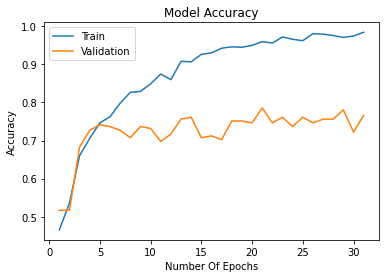

In [ ]:
#For Bidirectional LSTMs
import matplotlib.pyplot as plt

epochs=[x for x in range(1,32)]

plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

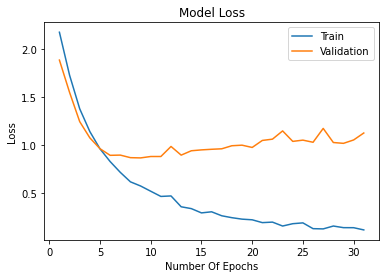

In [ ]:
#For Bidirectional LSTMs
epochs=[x for x in range(1,len(history.history['loss']))]

plt.plot(epochs,history.history['loss'])
plt.plot(epochs,history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number Of Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()